# 1. Motivation

* What is your dataset?
$$$$
The chosen dataset is: Motor Vehicle Collisions - Crashes dataset from [New York City OpenData](https://data.cityofnewyork.us/Public-Safety/Motor-Vehicle-Collisions-Crashes/h9gi-nx95).
$$$$
* Why did you choose this/these particular dataset(s)?
$$$$
This dataset has been chosen since understanding patterns in car crashed could help in reducing the casualties of traffic and reduce the amount of resources spent every year when dealing with accidents.
$$$$
* What was your goal for the end user's experience?
$$$$


# 2. Basic stats

* Write about your choices in data cleaning and preprocessing
$$$$
The first step has been to create a ```Date``` column to store the date and time information properly.
$$$$
* Write a short section that discusses the dataset stats, containing key points/plots from your exploratory data analysis.
$$$$
The dataset contains information about 1.68 million crashes in NYC. 

# 3. Data Analysis
* Describe your data analysis and explain what you've learned about the dataset.
$$$$
BlaBlaBla
$$$$
* If relevant, talk about your machine-learning.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap

In [2]:
df = pd.read_csv('C:/Users/czeta/Desktop/Crashes.csv')

df['Date'] = df['CRASH DATE'] + " " + df['CRASH TIME']
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y %H:%M')

df['Year'] = pd.DatetimeIndex(df['Date']).year
df['Month'] = pd.DatetimeIndex(df['Date']).month
df['Hour'] = pd.to_datetime(df['CRASH TIME']).dt.hour
df['Minute'] = pd.to_datetime(df['CRASH TIME']).dt.minute
df['DayOfWeek'] = pd.DatetimeIndex(df['Date']).dayofweek
df['HourOfWeek'] = (df['Hour'].values + df['DayOfWeek'].values*24)

C:\Users\czeta\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,Date,Year,Month,Hour,Minute,DayOfWeek,HourOfWeek
0,04/14/2021,5:32,NaN,NaN,NaN,NaN,NaN,BRONX WHITESTONE BRIDGE,NaN,NaN,...,NaN,NaN,NaN,2021-04-14 05:32:00,2021,4,5,32,2,53
1,04/13/2021,21:35,BROOKLYN,11217,40.68358,-73.97617,"(40.68358, -73.97617)",NaN,NaN,620 ATLANTIC AVENUE,...,NaN,NaN,NaN,2021-04-13 21:35:00,2021,4,21,35,1,45
2,04/15/2021,16:15,NaN,NaN,NaN,NaN,NaN,HUTCHINSON RIVER PARKWAY,NaN,NaN,...,NaN,NaN,NaN,2021-04-15 16:15:00,2021,4,16,15,3,88
3,04/13/2021,16:00,BROOKLYN,11222,NaN,NaN,NaN,VANDERVORT AVENUE,ANTHONY STREET,NaN,...,NaN,NaN,NaN,2021-04-13 16:00:00,2021,4,16,0,1,40
4,04/12/2021,8:25,NaN,NaN,0.00000,0.00000,"(0.0, 0.0)",EDSON AVENUE,NaN,NaN,...,NaN,NaN,NaN,2021-04-12 08:25:00,2021,4,8,25,0,8


In [4]:
print(np.min(df['Date']))
print(np.max(df['Date']))

2012-07-01 00:05:00
2021-04-20 23:48:00


In [5]:
df.columns

Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5',
       'Date', 'Year', 'Month', 'Hour', 'Minute', 'DayOfWeek', 'HourOfWeek'],
      dtype='object')

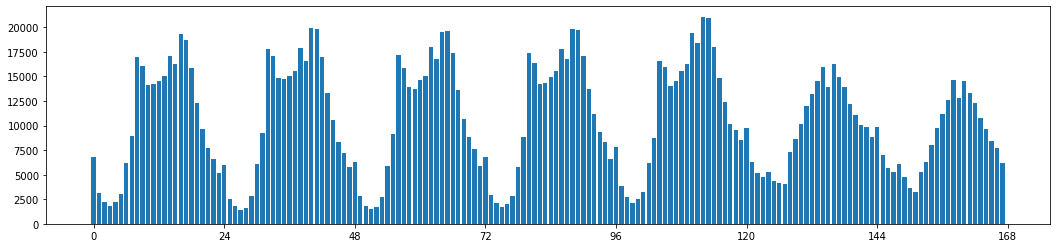

In [6]:
numbers_list = ['NUMBER OF PERSONS INJURED','NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED','NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED','NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED','NUMBER OF MOTORIST KILLED']

grouped = df.groupby(['HourOfWeek']).count()
grouped = grouped.reset_index()[['HourOfWeek', 'Month']]

plt.figure(figsize=(18,4))
plt.bar(grouped.HourOfWeek.values, grouped.Month.values)
plt.xticks(np.arange(0,168+1,24))
plt.show()

In [7]:
hmap = folium.Map([40.76, -73.96], zoom_start=10.5, tiles='Stamen Toner')

heat_data = [[row['LATITUDE'],row['LONGITUDE']] for index, row in df[(df.LONGITUDE.isnull() == False) & ( df.LATITUDE.isnull()== False) & (df.Year>2017) & (df['NUMBER OF PERSONS KILLED']>0)].iterrows()]

HeatMap(heat_data, radius = 20).add_to(hmap)
hmap

In [8]:
df_clean = df[(df.LONGITUDE.isnull() == False) & ( df.LATITUDE.isnull()== False)]

df_clean.replace('NaN', 0, inplace=True)

grouped2 = df_clean.groupby(['LATITUDE', 'LONGITUDE']).sum()[numbers_list]

C:\Users\czeta\Anaconda3\lib\site-packages\pandas\core\frame.py:4263: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [9]:
grouped2.sort_values('NUMBER OF PERSONS INJURED', ascending=False).head(n=100)

,,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED
LATITUDE,LONGITUDE,,,,,,,,
0.000000,0.000000,546.0,2.0,84,2,63,0,402,0
40.861862,-73.912820,296.0,0.0,3,0,9,0,279,0
40.798256,-73.827440,283.0,1.0,0,0,0,0,281,1
40.608757,-74.038086,270.0,0.0,0,0,0,0,270,0
40.604153,-74.051980,203.0,1.0,0,0,0,0,203,1
...,...,...,...,...,...,...,...,...,...
40.726563,-73.838013,79.0,0.0,0,0,0,0,79,0
40.744892,-73.770220,79.0,0.0,1,0,0,0,78,0
40.651733,-73.930381,78.0,0.0,29,0,3,0,46,0


In [10]:
top_10_persons_injured = grouped2.sort_values('NUMBER OF PERSONS INJURED', ascending=False).iloc[1:11].reset_index()
top_10_persons_killed = grouped2.sort_values('NUMBER OF PERSONS KILLED', ascending=False).iloc[1:11].reset_index()
top_10_pedestrians_injured = grouped2.sort_values('NUMBER OF PEDESTRIANS INJURED', ascending=False).iloc[1:11].reset_index()
top_10_pedestrians_killed = grouped2.sort_values('NUMBER OF PEDESTRIANS KILLED', ascending=False).iloc[1:11].reset_index()
top_10_cyclist_injured = grouped2.sort_values('NUMBER OF CYCLIST INJURED', ascending=False).iloc[1:11].reset_index()
top_10_cyclist_killed = grouped2.sort_values('NUMBER OF CYCLIST KILLED', ascending=False).iloc[1:11].reset_index()
top_10_motorist_injured = grouped2.sort_values('NUMBER OF MOTORIST INJURED', ascending=False).iloc[1:11].reset_index()
top_10_motorist_killed = grouped2.sort_values('NUMBER OF MOTORIST KILLED', ascending=False).iloc[1:11].reset_index()

top_10s = [top_10_persons_injured, top_10_persons_killed, top_10_pedestrians_injured, top_10_pedestrians_killed, top_10_cyclist_injured, top_10_cyclist_killed, top_10_motorist_injured, top_10_motorist_killed]

colors = ['red', 'grey', 'blue', 'yellow', 'green', 'orange', 'pink', 'lightblue']

In [11]:
mmap = folium.Map([40.76, -73.96], zoom_start=10.5, tiles='cartodbdark_matter')

for i, d in enumerate(top_10s):
    
    coor = [[row['LATITUDE'], row['LONGITUDE']]for index,row in d.iterrows()]
    for j, c in enumerate(coor):
        tooltip = str(d.columns[i+2]) + '\n Position number: '
        folium.CircleMarker(location=c, radius=(20-j), color=colors[i], fill=True, fill_color=colors[i],alpha=1, popup=str(tooltip + str(j+1))).add_to(mmap)
mmap

In [12]:
mmap.save("index.html")